# Nonlinear regressors: K-Nearest Neighbours

Using an open source [Obesity Levels Based On Eating Habits and Physical Condition dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) we're going to **model** and then **predict** *weight* based on multiple features with simple linear regression. The dataset is provided by [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/) which contains multiple datasets useful for studying and experimenting.

In [1]:
!pip install ucimlrepo

Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="deep")

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import median_absolute_error, r2_score, classification_report, PredictionErrorDisplay, median_absolute_error, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix
from ucimlrepo import fetch_ucirepo

plt.rcParams["figure.figsize"] = (10,7)

In [3]:
# constans
test_size=0.2
random_state=42

In [4]:
def compute_score(y_true, y_pred):
  '''
  Helper function for printing scores.

  Parameters:
  y_true: ndarray of y values from original dataset.
  y_pred: ndarray of y values predicted with given model.

  Return:
  dictionary object that consists of R2 and median absolute error scores.

  '''
  return {
        "R2": f"{r2_score(y_true, y_pred):.3f}",
        "MedianAE": f"{median_absolute_error(y_true, y_pred):.3f}",
}

In [5]:
def compute_score_classification(y_true, y_pred):
  '''
  Helper function for printing scores.

  Parameters:
  y_true: ndarray of y values from original dataset.
  y_pred: ndarray of y values predicted with given model.

  Return:
  dictionary object that consists of accuracy and classification report.

  '''
  return {
        "Accuracy": f"{accuracy_score(y_true, y_pred):.3f}",
        "Classification Report": classification_report(y_true, y_pred),
}

In [6]:
def plot_prediction_error(y_test, y_pred, scores):
  _, ax = plt.subplots(figsize=(5, 5))

  y_test = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test

  display_ = PredictionErrorDisplay.from_predictions(
      y_test,
      y_pred,
      kind="actual_vs_predicted",
      ax=ax,
      scatter_kwargs={"alpha": 0.5}
  )

  ax.set_title("Linear model")
  for name, score in scores.items():
      ax.plot([], [], " ", label=f"{name}: {score}")
  ax.legend(loc="upper left")
  plt.tight_layout()

## Load dataset

In [7]:
# fetch dataset
obesity_data = fetch_ucirepo(id=544)
obesity_data_df = obesity_data.data.features
obesity_data_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


Inspect the dataset

In [ ]:
obesity_data_df.describe()

## Regression

Recall the model from the last classes:

*Weight ~ Age + FCVC + Height*

So far, we modeled this relationship using linear regression. Let's take a look at how the non-linear estimator - KNN will manage to model this relationship.

To create a model with KNN estimator, you simply need to create an object of type [`KNeighborsRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) instead of the linear regression object. Give yourself a moment to read the documentation of KNN regressor.

### Exercise 1
Let's compare the performance of KNN to the linear model.

1. The first model is the simplest linear model we have already done

In [ ]:
# Linear regression model - for comparison
X = obesity_data_df[[
    'Age',
    'FCVC',
    'Height',
]]

y = obesity_data_df[['Weight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# create object of linear regression estimator
lm = linear_model.LinearRegression()

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

scores = compute_score(y_test, y_pred)
scores

In [ ]:
plot_prediction_error(y_test, y_pred, scores)

2. KNN Regressor model with *default parameters*:

In [ ]:
X = obesity_data_df[[
    'Age',
    'FCVC',
    'Height',
]]

y = obesity_data_df[['Weight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# create object of KNN estimator
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

scores = compute_score(y_test, y_pred)
scores

In [ ]:
plot_prediction_error(y_test, y_pred, scores)

There is quite a difference! We didn't have to do anything - with zero knowledge of the data, we got a better result than using linear regression and all our knowledge of the data.

### Exercise 2
Now - try to play a little bit with KNN. Maybe you can extract even more from the model by changing its parameters?

Create at least 3 different KNN  and change at leat 2 different parameters.

In [ ]:
# your code here

### (Exercise 2.1)

Too complex models tend to overfit, i.e., they are too closely matched to the training data and begin to perform poorly on the test data.
Plot training and testing performance vs number of neighbors to see, whether this model tends to overfit when the number of neighbors increases.

In [ ]:
# Your code here

What do you think this chart means for the problem of predicting orthodoxy based on personality traits? How many people with similar personality profiles is it best to look at to make a good prediction of the level of orthodoxy?

## Classification

Classification is a type of supervised learning task in machine learning and statistics where the goal is to assign labels or categories to input data. Essentially, classification involves predicting the **category or class** of new observations based on previous examples with known labels.

### Exercise 3

Initially, out dataset was dedicated to predict obesity levels based on the habits and physical conditions. Now, we are going to create classification model:

*Obesity level ~ Age + FCVC + Height*

The obesity level is stored in the `data.targets` attribute of the `obesity_data` variable.

Look into the documentation of [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and write down the code, employing the same patter as in the regression analysis.
To check the classification results, use the predefined `compute_score_classification()` method and print separately each metric. How you interpret the results of the model?

In [18]:
X = obesity_data_df[[
    'Age',
    'FCVC',
    'Height',
]]

y = obesity_data.data.targets['NObeyesdad'] # your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# create object of KNN Classifier
knn = KNeighborsClassifier() # your code here
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

scores = compute_score_classification(y_test, y_pred)
print(Classification Report)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-18-5e6235689450>, line 16)

### (Exercise 3.1)

If you create a 2D feature matrix, you can use `scikit-learn` utilities to plot the decision boundaries. Let's build a model with only two features, then use the code below.

In [ ]:
# your code here

In [15]:
X = obesity_data_df[[
    'Height',
    "Age",
]]

y = obesity_data.data.targets['NObeyesdad'] # your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# create object of KNN Classifier
knnplot = KNeighborsClassifier() # your code here
knnplot.fit(X_train, y_train)
y_pred = knnplot.predict(X_test)

scores = compute_score_classification(y_test, y_pred)
print(scores)

{'Accuracy': '0.522', 'Classification Report': '                     precision    recall  f1-score   support\n\nInsufficient_Weight       0.50      0.52      0.51        56\n      Normal_Weight       0.48      0.65      0.55        62\n     Obesity_Type_I       0.54      0.47      0.50        78\n    Obesity_Type_II       0.56      0.64      0.60        58\n   Obesity_Type_III       0.66      0.76      0.71        63\n Overweight_Level_I       0.51      0.32      0.40        56\nOverweight_Level_II       0.31      0.24      0.27        50\n\n           accuracy                           0.52       423\n          macro avg       0.51      0.51      0.50       423\n       weighted avg       0.51      0.52      0.51       423\n'}


<Figure size 1000x600 with 0 Axes>

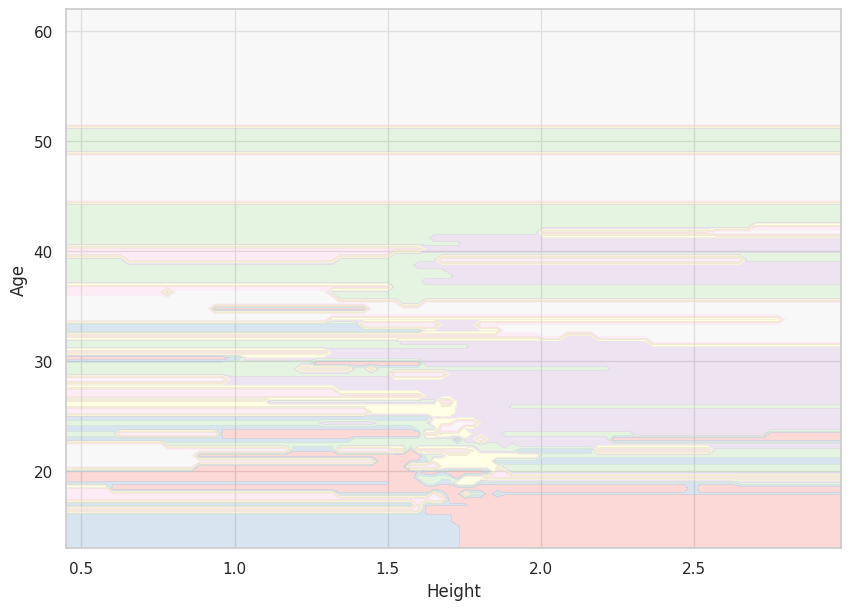

In [16]:
plt.figure(figsize=(10, 6))

disp = DecisionBoundaryDisplay.from_estimator(
    knnplot,
    X_train,
    response_method="predict",
    cmap="Pastel1",
    alpha=0.5,
    xlabel=X_train.columns[0],
    ylabel=X_train.columns[1],
)